# air_visit_data.csv

## 要約
- 252,108 行 3 列
- 欠損値無し
---
- air_store_id (店のID): ユニーク数 829
- visit_date   (来店日): 2016年1月1日~2017年4月17日
- visitors     (1日の来客数): 1~877, 平均 20.97
---
- 期間内に最も多くの来客数が観察されたのは2016年12月17日 (23,982人)
- 期間内に最も多くの来客があった店舗は air_399904bdb7685ca0 (18,717人)
- 1店舗あたりのレコード数は 20~477, 平均 304
---
- 2016年7月に急激に来客数が増加
- 日ごとの来客数は10日が最大
---
- 0621追加
    - 来客数が急激に増加したのは2016年7月1日
    - 7月1日より前の店舗数は316
    - 7月1日より後の店舗数は826

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
air_visit_data = pd.read_csv('../data/air_visit_data.csv',parse_dates=['visit_date'])

In [3]:
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [4]:
air_visit_data.shape

(252108, 3)

In [5]:
air_visit_data.dtypes

air_store_id            object
visit_date      datetime64[ns]
visitors                 int64
dtype: object

## 欠損値の確認

In [6]:
air_visit_data.isnull().any()

air_store_id    False
visit_date      False
visitors        False
dtype: bool

## 基礎集計

In [7]:
air_visit_data.describe(include='all')

,air_store_id,visit_date,visitors
count,252108,252108,252108.000000
unique,829,478,NaN
top,air_5c817ef28f236bdf,2017-03-17 00:00:00,NaN
freq,477,799,NaN
first,NaN,2016-01-01 00:00:00,NaN
last,NaN,2017-04-22 00:00:00,NaN
mean,NaN,NaN,20.973761
std,NaN,NaN,16.757007
min,NaN,NaN,1.000000
25%,NaN,NaN,9.000000


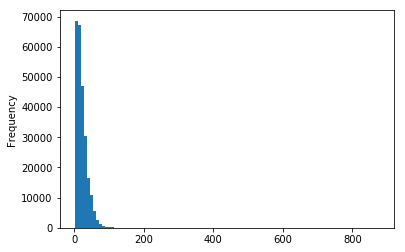

In [8]:
air_visit_data['visitors'].plot.hist(bins=100)

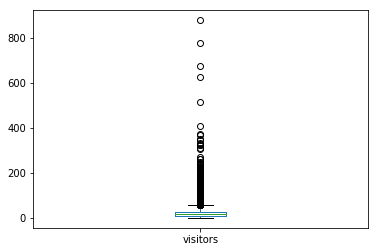

In [9]:
air_visit_data['visitors'].plot.box()

### 来店日×来客数

In [10]:
visitors_by_date=air_visit_data.groupby('visit_date')['visitors'].sum()
visitors_by_date.describe()

count      478.000000
mean     11062.035565
std       5079.505034
min       1033.000000
25%       5894.500000
50%      11429.500000
75%      14286.000000
max      23982.000000
Name: visitors, dtype: float64

In [11]:
visitors_by_date.idxmin(),visitors_by_date.idxmax()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2016-12-17 00:00:00'))

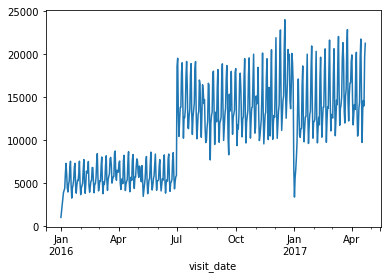

In [12]:
visitors_by_date.plot()

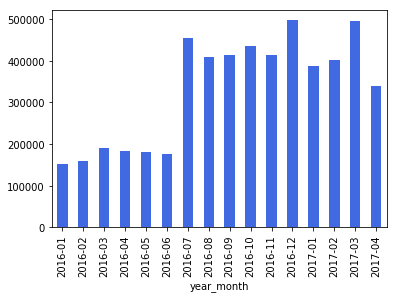

In [13]:
air_visit_data['year_month']=air_visit_data['visit_date'].dt.strftime('%Y-%m')
month_visitor=air_visit_data.groupby('year_month')['visitors'].sum()
month_visitor.plot.bar(color='royalblue')

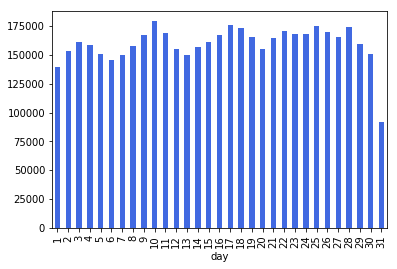

In [14]:
air_visit_data['day']=air_visit_data['visit_date'].dt.day
temp=air_visit_data[air_visit_data['visit_date']<'2017-04-01']
day_visitor=temp.groupby('day')['visitors'].sum()
day_visitor.plot.bar(color='royalblue')

### 店舗ID×来客数

In [15]:
visitors_by_store=air_visit_data.groupby('air_store_id')['visitors'].sum()
visitors_by_store.describe()

count      829.000000
mean      6378.351025
std       3919.690328
min        190.000000
25%       3328.000000
50%       5474.000000
75%       8791.000000
max      18717.000000
Name: visitors, dtype: float64

In [16]:
visitors_by_store.idxmin(), visitors_by_store.idxmax()

('air_a21ffca0bea1661a', 'air_399904bdb7685ca0')

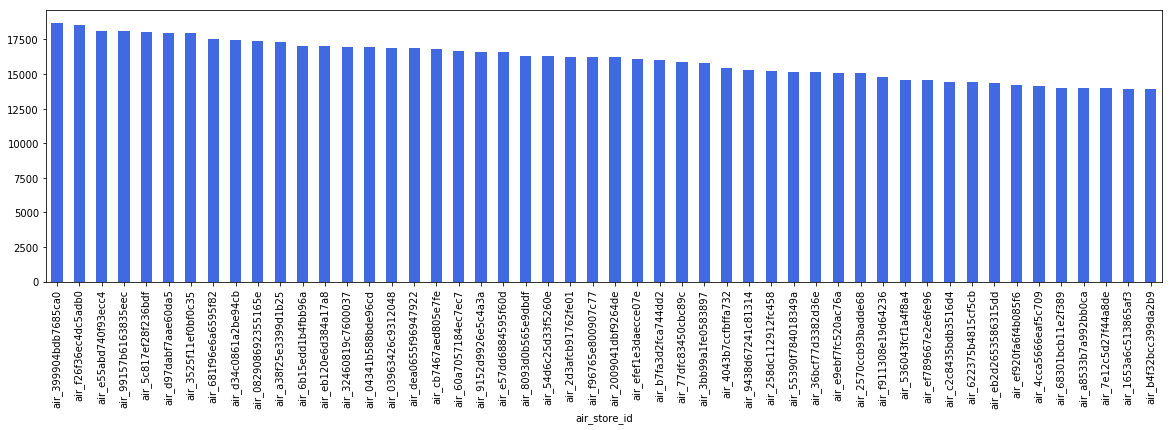

In [17]:
visitors_by_store.sort_values(ascending=False).head(50).plot.bar(figsize=(20,5), 
                                                                  color='royalblue')

### 店舗ID×来店日

In [18]:
store_by_date=air_visit_data.groupby('air_store_id')['visit_date'].count()
store_by_date.describe()

count    829.000000
mean     304.110977
std       93.482734
min       20.000000
25%      243.000000
50%      284.000000
75%      391.000000
max      477.000000
Name: visit_date, dtype: float64

### 来客数TOP5の来客数の推移

In [19]:
temp=visitors_by_store.sort_values(ascending=False).head(5)
top_5=air_visit_data[air_visit_data['air_store_id'].isin(temp.index)]

In [20]:
temp=top_5.groupby(['air_store_id', 'year_month'])['visitors'].sum().reset_index()

In [21]:
pv=temp.pivot_table(values=['visitors'], columns=['air_store_id'],
                    index=['year_month'],aggfunc='sum')

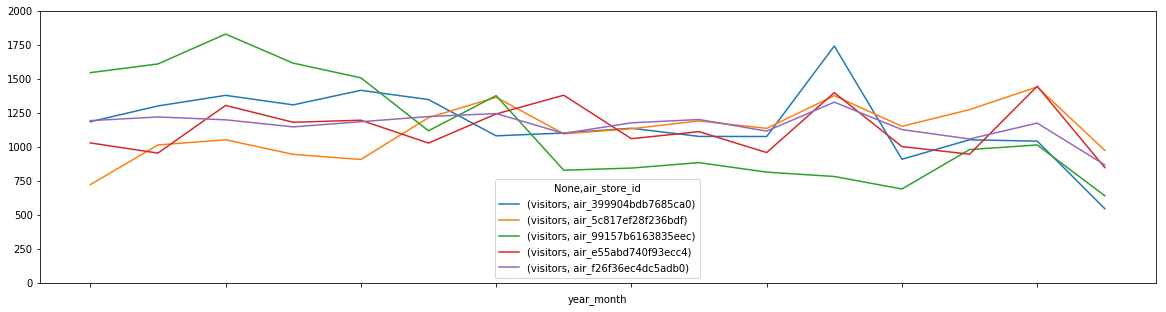

In [22]:
pv.plot(figsize=(20,5), ylim=(0,2000))

#### 0621追加の集計

In [29]:
visitors_by_date=visitors_by_date.reset_index
visitors_by_date['visitors_of_1_day_before']=visitors_by_date['visitors'].shift(1)
visitors_by_date['diff']=visitors_by_date['visitors'] - visitors_by_date['visitors_of_1_day_before']

In [39]:
visitors_by_date[visitors_by_date['diff']>10000]

,visit_date,visitors,visitors_of_1_day_before,diff
182,2016-07-01,18586,5898.0,12688.0


In [44]:
before_0701=air_visit_data[air_visit_data['visit_date']<'2016-07-01']
after_0701=air_visit_data[air_visit_data['visit_date']>='2016-07-01']

In [45]:
before_0701.describe(include='all')

,air_store_id,visit_date,visitors,year_month,day
count,47699,47699,47699.000000,47699,47699.000000
unique,316,182,NaN,6,NaN
top,air_5c65468938c07fa5,2016-06-24 00:00:00,NaN,2016-03,NaN
freq,182,304,NaN,8278,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN
last,NaN,2016-06-30 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,21.800499,NaN,15.948217
std,NaN,NaN,17.086586,NaN,8.677865
min,NaN,NaN,1.000000,NaN,1.000000
25%,NaN,NaN,9.000000,NaN,9.000000


In [46]:
after_0701.describe(include='all')

,air_store_id,visit_date,visitors,year_month,day
count,204409,204409,204409.000000,204409,204409.000000
unique,829,296,NaN,10,NaN
top,air_61b8d37c33617f21,2017-03-17 00:00:00,NaN,2017-03,NaN
freq,296,799,NaN,22292,NaN
first,NaN,2016-07-01 00:00:00,NaN,NaN,NaN
last,NaN,2017-04-22 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,20.780841,NaN,15.508666
std,NaN,NaN,16.673307,NaN,8.666995
min,NaN,NaN,1.000000,NaN,1.000000
25%,NaN,NaN,9.000000,NaN,8.000000
